In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import pandas as pd
files = [
    '/content/Data 1.xlsx',
    '//content/Data 2.xlsx',
    '/content/Data 3.xlsx'
]

dataframes = []
for file in files:
    xls = pd.ExcelFile(file)
    for sheet in xls.sheet_names:
        df = pd.read_excel(file, sheet_name=sheet)
        dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)
df.columns

Index(['Month', 'Temp(℃) ', 'pH', 'Total Dissolved Solids (mg/l)', 'DO (mg/l)',
       'Chlorides (mg/l)', 'Hardness  as CaCo3 (mg/l)', 'Calcium as Ca (mg/l)',
       'Magnesium as Mg (mg/l)', 'Alkalinity as CaCo3 (mg/l)', 'BOD (mg/l)',
       'COD (mg/l)', 'Total\nColiform\n(MPN/\n100 mL)',
       'Fecal\nColiform\n(MPN/\n100 mL)', 'Nitrate-N (mg/l)',
       'Sulphate (mg/l)', 'Sodium (mg/l)', '\nDBU'],
      dtype='object')

In [3]:
df.head()

,Month,Temp(℃),pH,Total Dissolved Solids (mg/l),DO (mg/l),Chlorides (mg/l),Hardness as CaCo3 (mg/l),Calcium as Ca (mg/l),Magnesium as Mg (mg/l),Alkalinity as CaCo3 (mg/l),BOD (mg/l),COD (mg/l),Total\nColiform\n(MPN/\n100 mL),Fecal\nColiform\n(MPN/\n100 mL),Nitrate-N (mg/l),Sulphate (mg/l),Sodium (mg/l),\nDBU
0,Jan-22,06°C,7.43,36.0,10.2,7.0,88.0,60.0,28.0,52.0,1.0,4.0,<2,<2,0.05,37.24,10.2,A
1,Feb-22,06°C,7.51,46.0,10.2,9.0,54.0,30.0,24.0,49.0,1.0,4.0,<2,<2,0.02,17.63,9.8,A
2,Mar-22,11°C,7.3,41.0,10.6,6.0,45.0,28.0,17.0,40.0,1.0,4.0,<2,<2,0.07,17.83,10.5,A
3,Apr-22,08°C,7.23,27.0,11,6.0,36.0,22.0,14.0,32.0,1.0,4.0,<2,<2,0.04,16.11,12.2,A
4,May-22,07°C,7.05,25.0,10.6,5.0,32.0,18.0,14.0,40.0,1.0,4.0,<2,<2,0.06,33.26,1.9,A


In [4]:
columns = df.columns
duplicate_columns = columns[columns.duplicated()]

print("Duplicate columns:", duplicate_columns.tolist())

Duplicate columns: []


In [5]:
df.shape

(2895, 18)

In [6]:
df.dtypes

,0
Month,object
Temp(℃),object
pH,object
Total Dissolved Solids (mg/l),float64
DO (mg/l),object
Chlorides (mg/l),object
Hardness as CaCo3 (mg/l),float64
Calcium as Ca (mg/l),float64
Magnesium as Mg (mg/l),float64
Alkalinity as CaCo3 (mg/l),float64


In [7]:
df['Temp(℃) '].unique()

array(['06°C', '11°C', '08°C', '07°C', '09°C', '10°C', '04°C', '05°C',
       '03°C', '13°C', '12°C', '15°C', '14°C', '09C', '16°C', '19°C',
       '20°C', '17°C', '21°C', '18°C', '22°C', '02°C', nan, '23°C',
       '24°C', '25°C', 'River was Dry', 'River Was Dry', '15.3°C',
       '19.2°C', '18.8°C', '25.6°C', '24.2°C', '26°C', '22.3°C', '20.1°C',
       '15.7°C', '19.5°C', '19.3°C', '23.1°C', '27.3°C', '27°C', '22.6°C',
       '20.5°C', '15.9°C', '20.4°C', '18.5°C', '27.4°C', '27.1°C',
       '24.8°C', '23.5°C', '22.8°C', '18.0°C', '19.1°C', '19.4°C',
       '23.3°C', '24.9°C', '25.7°C', '20.2°C', '15.4°C', '15.1°C',
       '19.0°C', '25.2°C', '21.9C', '22.1°C', '19.7°C', '15.6°C',
       '15.5°C', '24.1°C', '22.7°C', '30.6°C', '28°C', '23.7°C', '24.4°C',
       '16.4°C', '16.1°C', '21.1°C', '18.2°C', '26.8°C', '24.5°C', '29°C',
       '17.5°C', '14.0°C', '18.9°C', '26.7°C', '21.5°C', '15.8°C',
       '28.8°C', '31.8°C', '32.8°C', '25.3°C', '19.8°C', '28.5°C',
       '27.2°C', '26.1°

In [8]:
df.dropna(inplace = True)
df.isnull().sum()

,0
Month,0
Temp(℃),0
pH,0
Total Dissolved Solids (mg/l),0
DO (mg/l),0
Chlorides (mg/l),0
Hardness as CaCo3 (mg/l),0
Calcium as Ca (mg/l),0
Magnesium as Mg (mg/l),0
Alkalinity as CaCo3 (mg/l),0


In [9]:
df['Temp(℃) '].unique()

array(['06°C', '11°C', '08°C', '07°C', '09°C', '10°C', '04°C', '05°C',
       '03°C', '13°C', '12°C', '15°C', '14°C', '09C', '16°C', '19°C',
       '20°C', '17°C', '21°C', '18°C', '22°C', '02°C', '23°C', '24°C',
       '25°C', '15.3°C', '19.2°C', '18.8°C', '25.6°C', '24.2°C', '26°C',
       '22.3°C', '20.1°C', '15.7°C', '19.5°C', '19.3°C', '23.1°C',
       '27.3°C', '27°C', '22.6°C', '20.5°C', '15.9°C', '20.4°C', '18.5°C',
       '27.4°C', '27.1°C', '24.8°C', '23.5°C', '22.8°C', '18.0°C',
       '19.1°C', '19.4°C', '23.3°C', '24.9°C', '25.7°C', '20.2°C',
       '15.4°C', '15.1°C', '19.0°C', '25.2°C', '21.9C', '22.1°C',
       '19.7°C', '15.6°C', '15.5°C', '24.1°C', '22.7°C', '30.6°C', '28°C',
       '23.7°C', '24.4°C', '16.4°C', '16.1°C', '21.1°C', '18.2°C',
       '26.8°C', '24.5°C', '29°C', '17.5°C', '14.0°C', '18.9°C', '26.7°C',
       '21.5°C', '15.8°C', '28.8°C', '31.8°C', '32.8°C', '25.3°C',
       '19.8°C', '28.5°C', '27.2°C', '26.1°C', '21.2°C', '31.0°C',
       '32.6°C', '28.4

In [10]:
def clean_temperature(temp):
    if isinstance(temp, str):
        temp = temp.replace('°C', '').replace('˚C', '').replace('C', '').strip()
    return float(temp)

df['Temp(℃) '] = df['Temp(℃) '].apply(clean_temperature)

print(df.dtypes)

Month                               object
Temp(℃)                            float64
pH                                  object
Total Dissolved Solids (mg/l)      float64
DO (mg/l)                           object
Chlorides (mg/l)                    object
Hardness  as CaCo3 (mg/l)          float64
Calcium as Ca (mg/l)               float64
Magnesium as Mg (mg/l)             float64
Alkalinity as CaCo3 (mg/l)         float64
BOD (mg/l)                          object
COD (mg/l)                          object
Total\nColiform\n(MPN/\n100 mL)     object
Fecal\nColiform\n(MPN/\n100 mL)     object
Nitrate-N (mg/l)                   float64
Sulphate (mg/l)                    float64
Sodium (mg/l)                      float64
\nDBU                               object
dtype: object


In [11]:
df['Temp(℃) '].isnull().sum()

0

In [12]:
df['pH'].astype(float)

,pH
0,7.43
1,7.51
2,7.30
3,7.23
4,7.05
...,...
2890,7.66
2891,7.71
2892,7.62
2893,7.41


In [13]:
df['pH'] = pd.to_numeric(df['pH'])

df.dtypes

,0
Month,object
Temp(℃),float64
pH,float64
Total Dissolved Solids (mg/l),float64
DO (mg/l),object
Chlorides (mg/l),object
Hardness as CaCo3 (mg/l),float64
Calcium as Ca (mg/l),float64
Magnesium as Mg (mg/l),float64
Alkalinity as CaCo3 (mg/l),float64


In [14]:
df['pH'].isnull().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2441 entries, 0 to 2894
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Month                          2441 non-null   object 
 1   Temp(℃)                        2441 non-null   float64
 2   pH                             2441 non-null   float64
 3   Total Dissolved Solids (mg/l)  2441 non-null   float64
 4   DO (mg/l)                      2441 non-null   object 
 5   Chlorides (mg/l)               2441 non-null   object 
 6   Hardness  as CaCo3 (mg/l)      2441 non-null   float64
 7   Calcium as Ca (mg/l)           2441 non-null   float64
 8   Magnesium as Mg (mg/l)         2441 non-null   float64
 9   Alkalinity as CaCo3 (mg/l)     2441 non-null   float64
 10  BOD (mg/l)                     2441 non-null   object 
 11  COD (mg/l)                     2441 non-null   object 
 12  Total
Coliform
(MPN/
100 mL)   2441 non-null   object

In [16]:
df['Total Dissolved Solids (mg/l)'].isnull().sum()

0

In [17]:
df['DO (mg/l)'].unique()

array([10.2, 10.6, 11, 10.4, 10.8, 10, 9.6, 9.8, 9.4, 9.2, 8.2, 9, 8.6,
       8.4, 8.8, 3.4, 3.6, 3.2, 3, 4.8, 3.8, 4.6, 4.2, 6.8, 6.6, 6.4, 7,
       7.2, 7.4, 8, 7.8, 7.6, 5.6, 2.6, 2.2, 4.4, 'NIL', 1.2, 2, 1, 1.6,
       0.9, 4, 5.2, 5.4, 5.8, 9.5, 8.1, 8.5, 7.9, 8.9, 9.9, 8.3, 9.1, 7.5,
       9.3, 6.2, 6.7, 6, 5, 7.3, 8.7, 6.1, 6.3, 6.5, 5.5, 5.3, 1.5, 1.4,
       1.3, 2.1, 5.1, 5.7, 2.4, 1.8, 2.8, 4.5, 4.9, 2.9, 4.3, 3.5, 2.5,
       0.8, 2.3, 11.2, 11.4, 11.6, 11.8, 0.6, 7.7, 10.3, 9.18, 9.08, 8.76,
       7.1, 9.7, 5.9, 6.9, 4.1, 1.9, 1.7, 3.9, 3.3, 12, 11.1, 10.9, 10.5,
       10.1, 10.7, 9.51, 8.12, 0.7, 'Nil', 3.1], dtype=object)

In [18]:
df['DO (mg/l)'] = df['DO (mg/l)'].replace(to_replace=['NIL', 'Nil'], value=np.nan)
df['DO (mg/l)'].isnull().sum()

<ipython-input-18-1f2131af0d68>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DO (mg/l)'] = df['DO (mg/l)'].replace(to_replace=['NIL', 'Nil'], value=np.nan)


16

<Axes: ylabel='DO (mg/l)'>

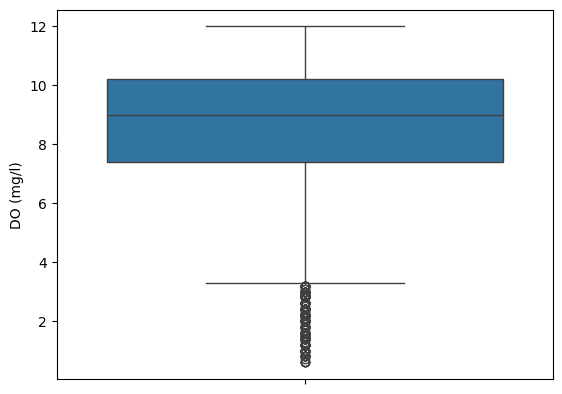

In [19]:
sns.boxplot(data=df['DO (mg/l)'])

In [20]:
df['DO (mg/l)'].fillna(df['DO (mg/l)'].mean(), inplace=True)
df['DO (mg/l)'].isnull().sum()

<ipython-input-20-4c1c50df68e9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DO (mg/l)'].fillna(df['DO (mg/l)'].mean(), inplace=True)


0

In [21]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

df['Chlorides (mg/l)'] = pd.to_numeric(df['Chlorides (mg/l)'], errors='coerce')
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = df.copy()
df_imputed[['Chlorides (mg/l)']] = knn_imputer.fit_transform(df[['Chlorides (mg/l)']])
print("Unique values after KNN imputation:")
print(df_imputed['Chlorides (mg/l)'].unique())


Unique values after KNN imputation:
[  7.           9.           6.           5.           2.5
   2.           3.           8.           5.5          4.5
   4.           3.5          7.5         10.           6.5
  13.          14.          12.           8.5         40.
  35.          43.          36.          26.          28.
  20.          17.          25.          15.          11.
  38.          18.          52.          56.          46.
  23.          58.          66.          48.          32.
  16.          45.          44.          30.          19.
  24.          34.          39.          37.          33.
   6.6          8.2          9.4          8.6         22.
  21.          11.9         10.2         15.9         12.24
  14.4         14.9         21.9         74.98        80.94
  87.98        88.64        86.72        90.12        84.
  64.          55.          29.          15.96        17.3
  18.9         18.2         80.9         84.46        90.97
  92.8         88.        

In [22]:

df['Hardness  as CaCo3 (mg/l)'] = pd.to_numeric(df['Hardness  as CaCo3 (mg/l)'], errors='coerce')
median_value = df['Hardness  as CaCo3 (mg/l)'].median()
df['Hardness  as CaCo3 (mg/l)'].fillna(median_value, inplace=True)

print("Unique values after median imputation:")
print(df['Hardness  as CaCo3 (mg/l)'].unique())


Unique values after median imputation:
[ 88.    54.    45.    36.    32.    63.    51.    59.    38.    66.
  80.   100.   116.    90.   130.    94.    92.   124.   110.    97.
  60.   113.    84.    71.    79.    70.    65.    91.    67.    64.
  76.    52.   140.    74.    73.    56.    72.    55.   122.    62.
  68.    78.    40.    69.    75.    86.    82.    96.    98.    99.
 120.    50.    85.    30.    44.    48.    95.    58.    89.    49.
  83.    33.    61.   160.   142.    53.   106.    77.    87.   170.
 112.   265.   155.   210.   105.   102.   108.   115.   200.   104.
 250.   260.   220.   186.   190.   118.   150.   270.   258.   240.
 136.   256.   153.   135.   195.   185.   180.   234.   224.   198.
 188.   235.   193.   440.   411.   308.   292.   396.   412.   390.
 287.   230.   353.   400.   280.   378.   162.   176.   386.   366.
 264.   261.   205.   212.   320.   132.   152.    93.   114.   138.
 134.    46.   300.   252.   281.   310.   322.   460.   119.   

<ipython-input-22-0857ae52f9db>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hardness  as CaCo3 (mg/l)'].fillna(median_value, inplace=True)


In [23]:

median_value = df['Calcium as Ca (mg/l)'].median()
df['Calcium as Ca (mg/l)'].fillna(median_value, inplace=True)

print("Unique values after median imputation:")
print(df['Calcium as Ca (mg/l)'].unique())

Unique values after median imputation:
[ 60.    30.    28.    22.    18.    45.    35.    40.    42.    66.
  81.    80.    70.    76.    58.    77.    68.    87.    46.    36.
  48.    62.    44.    52.    57.    53.    61.    56.    54.    55.
  49.    39.    89.    64.    50.    96.    74.    41.    90.    51.
  43.    34.    21.    24.    59.    72.    33.    16.   130.   100.
  38.    67.    79.    63.    32.    27.   150.   247.   110.   118.
  73.    69.    78.    91.   140.   170.   200.   180.   160.   108.
 138.    88.   120.   230.   210.   186.   205.   102.   168.   167.
 165.   178.   194.   217.   155.   182.   171.   190.   270.   309.
 268.   256.   352.   292.   360.   220.   188.   184.   310.   198.
 240.   381.   340.   137.   157.   159.   128.   302.   151.   244.
 222.   179.   119.   242.   145.   175.   181.   280.   116.    84.
 141.    71.    47.   156.    93.   106.    75.    82.    86.    92.
 245.   225.   129.   260.   248.   355.   231.    99.   123.   

<ipython-input-23-573ede04cb8f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Calcium as Ca (mg/l)'].fillna(median_value, inplace=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2441 entries, 0 to 2894
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Month                          2441 non-null   object 
 1   Temp(℃)                        2441 non-null   float64
 2   pH                             2441 non-null   float64
 3   Total Dissolved Solids (mg/l)  2441 non-null   float64
 4   DO (mg/l)                      2441 non-null   float64
 5   Chlorides (mg/l)               2440 non-null   float64
 6   Hardness  as CaCo3 (mg/l)      2441 non-null   float64
 7   Calcium as Ca (mg/l)           2441 non-null   float64
 8   Magnesium as Mg (mg/l)         2441 non-null   float64
 9   Alkalinity as CaCo3 (mg/l)     2441 non-null   float64
 10  BOD (mg/l)                     2441 non-null   object 
 11  COD (mg/l)                     2441 non-null   object 
 12  Total
Coliform
(MPN/
100 mL)   2441 non-null   object

In [25]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
df['Magnesium as Mg (mg/l)'] = knn_imputer.fit_transform(df[['Magnesium as Mg (mg/l)']])
df['Magnesium as Mg (mg/l)'].isnull().sum()

0

In [26]:
df['Alkalinity as CaCo3 (mg/l)'].unique()

array([ 52.,  49.,  40.,  32.,  42.,  38.,  45.,  30.,  50.,  55.,  70.,
        75.,  85.,  63.,  71.,  73.,  54.,  58.,  60.,  56.,  53.,  61.,
        48.,  82.,  69.,  78.,  66.,  57.,  65.,  68.,  80.,  76.,  87.,
        98.,  72.,  62.,  59.,  67.,  77.,  93.,  35.,  79.,  34.,  46.,
       102.,  84.,  64.,  74.,  51.,  43.,  28.,  18.,  95.,  44.,  31.,
        29.,  47.,  89.,  91.,  37.,  41., 126., 146.,  88., 140.,  90.,
       150.,  22.,  97., 135., 105., 190., 230., 195., 163., 173., 210.,
        81., 145.,  96., 224., 212., 160., 114., 115., 157., 179., 184.,
       165., 130., 180., 200., 118., 176., 207., 312., 262., 240., 401.,
       339., 302., 254., 153., 202., 290., 172., 250., 215., 444., 152.,
       170., 166., 340., 196., 187., 197., 110., 106.,  83., 159., 120.,
        92.,  99., 107., 168., 175., 155., 242., 193., 131., 243., 374.,
       253., 213., 238., 181., 376., 294., 420., 189., 219., 311., 470.,
       410., 208., 198., 194., 307., 320., 199., 20

In [27]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df[['Alkalinity as CaCo3 (mg/l)']] = knn_imputer.fit_transform(df[['Alkalinity as CaCo3 (mg/l)']])


In [28]:
df['BOD (mg/l)'].unique()

array([1.0, 1.2, 1.4, 1.6, 1.5, 1.3, 24.0, 22.0, 25.0, 18.0, 16.0, 1.1,
       2.4, 2.2, 2.0, 1.9, 1.8, 20.0, 14.0, 52.0, 54.0, 36.0, 28.0, 46.0,
       38.0, 30.0, 35.0, 19.0, 23.0, 9.6, 10.0, 8.8, 8.4, 8.0, 9.0, 7.6,
       7.0, 7.2, 6.0, 6.4, 2.6, 2.5, 2.8, 2.1, 3.8, 3.6, 3.0, 0.8, 3.1,
       3.2, 3.4, 3.5, 5.0, 5.2, 4.5, 3.3, 19.5, 16.8, 26.0, 3.9, 15.5,
       12.0, 17.0, 60.0, 50.0, 48.0, 9.2, 9.4, 8.6, 4.0, 11.0, 4.4, 4.8,
       7.8, 5.8, 6.7, 13.0, 6.2, 22.5, 34.0, 32.0, 1.7, 27.0, 2.9, 2.7,
       56.0, 58.0, 55.0, 51.0, 29.0, 2.3, 15.0, 10.2, 4.6, 'BDL (<1)', 53,
       47, 44, 4.9, 4.2, 42], dtype=object)

In [29]:
from sklearn.impute import KNNImputer
import numpy as np
df['BOD (mg/l)'] = df['BOD (mg/l)'].replace('BDL (<1)', np.nan)
df['BOD (mg/l)'] = pd.to_numeric(df['BOD (mg/l)'], errors='coerce')
imputer = KNNImputer(n_neighbors=5)
df[['BOD (mg/l)']] = imputer.fit_transform(df[['BOD (mg/l)']])
df['BOD (mg/l)'].isnull().sum()

<ipython-input-29-5f2fe9d91581>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BOD (mg/l)'] = df['BOD (mg/l)'].replace('BDL (<1)', np.nan)


0

In [30]:
df['BOD (mg/l)'].unique()

array([ 1.        ,  1.2       ,  1.4       ,  1.6       ,  1.5       ,
        1.3       , 24.        , 22.        , 25.        , 18.        ,
       16.        ,  1.1       ,  2.4       ,  2.2       ,  2.        ,
        1.9       ,  1.8       , 20.        , 14.        , 52.        ,
       54.        , 36.        , 28.        , 46.        , 38.        ,
       30.        , 35.        , 19.        , 23.        ,  9.6       ,
       10.        ,  8.8       ,  8.4       ,  8.        ,  9.        ,
        7.6       ,  7.        ,  7.2       ,  6.        ,  6.4       ,
        2.6       ,  2.5       ,  2.8       ,  2.1       ,  3.8       ,
        3.6       ,  3.        ,  0.8       ,  3.1       ,  3.2       ,
        3.4       ,  3.5       ,  5.        ,  5.2       ,  4.5       ,
        3.3       , 19.5       , 16.8       , 26.        ,  3.9       ,
       15.5       , 12.        , 17.        , 60.        , 50.        ,
       48.        ,  9.2       ,  9.4       ,  8.6       ,  4.  

In [31]:
from sklearn.impute import KNNImputer
import numpy as np
df['COD (mg/l)'] = df['COD (mg/l)'].replace('BDL (<5)', np.nan)
df['COD (mg/l)'] = pd.to_numeric(df['COD (mg/l)'], errors='coerce')
imputer = KNNImputer(n_neighbors=5)
df[['COD (mg/l)']] = imputer.fit_transform(df[['COD (mg/l)']])
df['COD (mg/l)'].isnull().sum()

<ipython-input-31-a49a6360b80b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['COD (mg/l)'] = df['COD (mg/l)'].replace('BDL (<5)', np.nan)


0

In [32]:
df['Total\nColiform\n(MPN/\n100 mL)'].unique()

array(['<2', '<1.8', 32, 34, 31, 33, 38, 40, 43, 47, 48, 41, 24, 23, 22,
       26, 46, 49, 39, 10, 12, 17, 25, 27, 63, 58, 70, 79, 84, 94,
       '≥1600', 9200, 8400, 78, 110, 120, 130, 1600, 210, 350, 16000,
       7000, 4600, 1700, 280000, 220, 540, 4700, 35000, 2100, 1400, 140,
       170, 280, 150, 240, 900, 430, 920, 1.8, 2, 21, 4, 6.1, 4.5, 6.8, 6,
       6300, 17000, '>1600', 160000, '28×102', '35×102', 92000, '22×102',
       '21×102', '14×102', 180, '17×102', '13×102'], dtype=object)

In [33]:

df.rename(columns={'Total\nColiform\n(MPN/\n100 mL)': 'Total_Coliform_MPN'}, inplace=True)
df['Total_Coliform_MPN'] = df['Total_Coliform_MPN'].replace({
    '<2': 1.9,
    '<1.8': 1.7,
    '≥1600': 1600,
    '>1600': 1600
}, regex=False)
df['Total_Coliform_MPN'] = df['Total_Coliform_MPN'].replace(
    r'(\d+)×(\d+)',
    lambda x: str(int(x.group(1)) * 10**int(x.group(2))),
    regex=True
)
df['Total_Coliform_MPN'] = pd.to_numeric(df['Total_Coliform_MPN'], errors='coerce')
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['Total_Coliform_MPN']] = imputer.fit_transform(df[['Total_Coliform_MPN']])

<Axes: ylabel='Total_Coliform_MPN'>

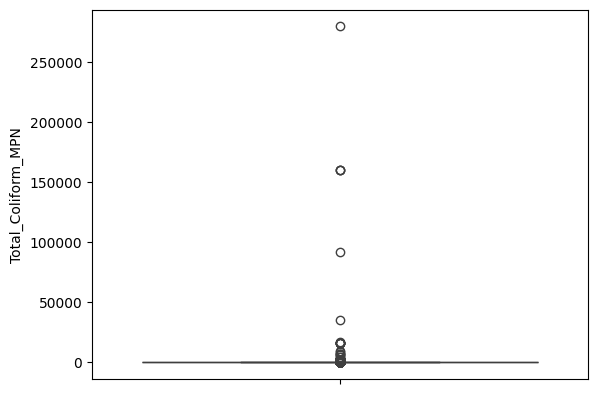

In [34]:
sns.boxplot(data = df['Total_Coliform_MPN'])

<Axes: ylabel='Total_Coliform_MPN'>

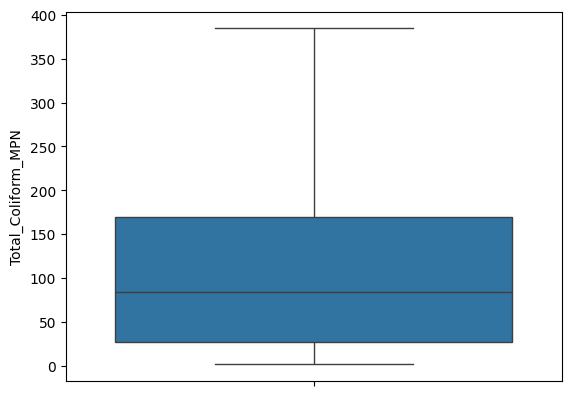

In [35]:

Q1 = df['Total_Coliform_MPN'].quantile(0.25)
Q3 = df['Total_Coliform_MPN'].quantile(0.75)
IQR = Q3 - Q1
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR
df['Total_Coliform_MPN'] = df['Total_Coliform_MPN'].clip(lower=lower_boundary, upper=upper_boundary)
sns.boxplot(data = df['Total_Coliform_MPN'])

In [36]:
df['Fecal\nColiform\n(MPN/\n100 mL)'].unique()

array(['<2', '<1.8', 14, 17, 13, 20, 21, 22, 26, 27, 12, 15, 33, 31, 24,
       6.1, 8.2, 10, 32, 7.8, 8.3, 9.1, 23, 25, 39, 41, 38, 34, 48, 43,
       40, 47, 58, 46, '≥1600', 4700, 4800, 49, 63, 69, 70, 79, 84, 920,
       170, 280, 480, 3900, 2300, 1100, 170000, 140, 350, 3300, 1300, 11,
       110, 120, 130, 94, 30, 210, 220, 240, 430, 540, 150, 500, 1.8, 4,
       2, 4.5, 4100, 6300, 14000, '>1600', 28000, 5400, 1700, 9200,
       '17×102', '14×102', 17000, 1600, 3500, 92000, '11×102', '22×102',
       '13×102', '28×102'], dtype=object)

In [37]:
df.rename(columns={'Fecal\nColiform\n(MPN/\n100 mL)': 'Fecal_Coliform_MPN'}, inplace=True)

import re


def clean_value(value):
    if isinstance(value, str):
        if '×' in value:
            value = re.sub(r'×', '*10**', value)
            return eval(value)
        elif value.startswith('<'):
            return float(value[1:])
        elif value.startswith('>') or value.startswith('≥'):
            return float(value[1:])
    return value

df['Fecal_Coliform_MPN'] = df['Fecal_Coliform_MPN'].apply(clean_value).astype(float)
Q1 = df['Fecal_Coliform_MPN'].quantile(0.25)
Q3 = df['Fecal_Coliform_MPN'].quantile(0.75)
IQR = Q3 - Q1

lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

df['Fecal_Coliform_MPN'] = df['Fecal_Coliform_MPN'].clip(lower=lower_boundary, upper=upper_boundary)
median_value = df['Fecal_Coliform_MPN'].median()
df['Fecal_Coliform_MPN'].fillna(median_value, inplace=True)
null_count = df['Fecal_Coliform_MPN'].isnull().sum()
print(f"Number of null values: {null_count}")


Number of null values: 0


<ipython-input-37-95a2b289530f>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fecal_Coliform_MPN'].fillna(median_value, inplace=True)


In [38]:
df['Sulphate (mg/l)'] = pd.to_numeric(df['Sulphate (mg/l)'], errors='coerce')
mean_sulphate = df['Sulphate (mg/l)'].mean()
df['Sulphate (mg/l)'].fillna(mean_sulphate, inplace=True)

<ipython-input-38-0f563c7073d4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sulphate (mg/l)'].fillna(mean_sulphate, inplace=True)


In [39]:
df['Sodium (mg/l)'] = pd.to_numeric(df['Sodium (mg/l)'], errors='coerce')
mean_sulphate = df['Sodium (mg/l)'].mean()
df['Sodium (mg/l)'].fillna(mean_sulphate, inplace=True)

<ipython-input-39-4a91a1d468e6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sodium (mg/l)'].fillna(mean_sulphate, inplace=True)


In [40]:
df.rename(columns={'\nDBU': 'DBU'}, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2441 entries, 0 to 2894
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Month                          2441 non-null   object 
 1   Temp(℃)                        2441 non-null   float64
 2   pH                             2441 non-null   float64
 3   Total Dissolved Solids (mg/l)  2441 non-null   float64
 4   DO (mg/l)                      2441 non-null   float64
 5   Chlorides (mg/l)               2440 non-null   float64
 6   Hardness  as CaCo3 (mg/l)      2441 non-null   float64
 7   Calcium as Ca (mg/l)           2441 non-null   float64
 8   Magnesium as Mg (mg/l)         2441 non-null   float64
 9   Alkalinity as CaCo3 (mg/l)     2441 non-null   float64
 10  BOD (mg/l)                     2441 non-null   float64
 11  COD (mg/l)                     2441 non-null   float64
 12  Total_Coliform_MPN             2441 non-null   float6

In [42]:
df['DBU'].value_counts()

,count
DBU,
B,1030
A,962
E,245
D,127
C,77


In [43]:
dbu_mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4
}

df['DBU'] = df['DBU'].map(dbu_mapping)

print(df["DBU"].value_counts())

DBU
1    1030
0     962
4     245
3     127
2      77
Name: count, dtype: int64


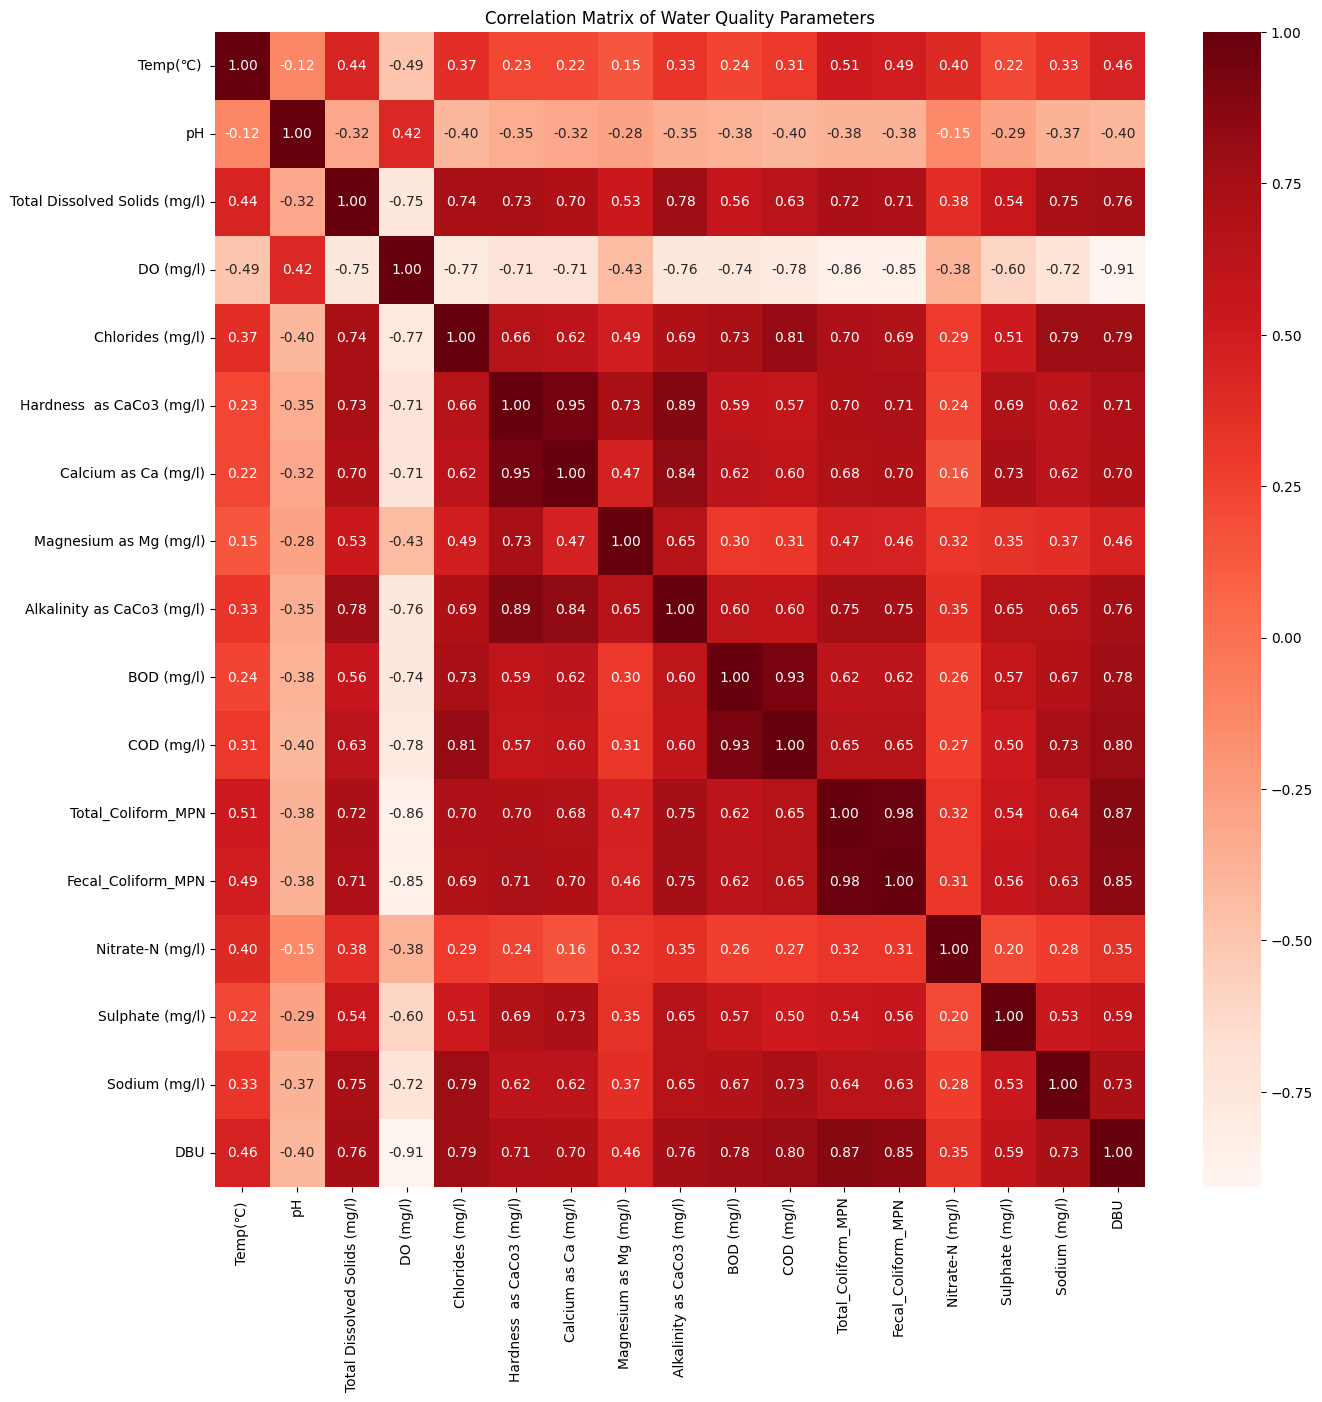

      Temp(℃)         pH  Total Dissolved Solids (mg/l)  DO (mg/l)  \
DBU                                                                  
0    15.234407  7.737599                      74.088358  10.248649   
1    19.567767  7.677825                     178.002845   8.253252   
2    24.049351  7.615455                     221.812987   6.915584   
3    24.420472  7.423228                     265.952756   5.457480   
4    22.394286  7.241306                     347.715918   2.495039   

     Chlorides (mg/l)  Hardness  as CaCo3 (mg/l)  Calcium as Ca (mg/l)  \
DBU                                                                      
0            4.760874                  77.713098             58.824324   
1           12.050621                 158.896699            102.599029   
2           18.191688                 191.542857            135.394805   
3           22.571181                 193.137480            145.997638   
4           44.977837                 303.533592            231.0

In [44]:
df = df.drop(columns=["Month"], errors='ignore')
numeric_columns = df.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap="Reds", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Water Quality Parameters")
plt.show()
grouped_stats = df.groupby("DBU").mean()
print(grouped_stats)


In [45]:
nan_rows = df.isnull()
print(nan_rows)
nan_count = df.isnull().sum()
print("\nNaN counts per column:\n", nan_count)
rows_with_nan = df[df.isnull().any(axis=1)]
print("\nRows with NaN values:\n", rows_with_nan)

      Temp(℃)      pH  Total Dissolved Solids (mg/l)  DO (mg/l)  \
0        False  False                          False      False   
1        False  False                          False      False   
2        False  False                          False      False   
3        False  False                          False      False   
4        False  False                          False      False   
...        ...    ...                            ...        ...   
2890     False  False                          False      False   
2891     False  False                          False      False   
2892     False  False                          False      False   
2893     False  False                          False      False   
2894     False  False                          False      False   

      Chlorides (mg/l)  Hardness  as CaCo3 (mg/l)  Calcium as Ca (mg/l)  \
0                False                      False                 False   
1                False                      F

In [46]:
df['Chlorides (mg/l)'].isnull().sum()

1

In [47]:
df.dropna()

,Temp(℃),pH,Total Dissolved Solids (mg/l),DO (mg/l),Chlorides (mg/l),Hardness as CaCo3 (mg/l),Calcium as Ca (mg/l),Magnesium as Mg (mg/l),Alkalinity as CaCo3 (mg/l),BOD (mg/l),COD (mg/l),Total_Coliform_MPN,Fecal_Coliform_MPN,Nitrate-N (mg/l),Sulphate (mg/l),Sodium (mg/l),DBU
0,6.0,7.43,36.0,10.2,7.0,88.0,60.0,28.0,52.0,1.0,4.0,1.9,2.0,0.05,37.24,10.2,0
1,6.0,7.51,46.0,10.2,9.0,54.0,30.0,24.0,49.0,1.0,4.0,1.9,2.0,0.02,17.63,9.8,0
2,11.0,7.30,41.0,10.6,6.0,45.0,28.0,17.0,40.0,1.0,4.0,1.9,2.0,0.07,17.83,10.5,0
3,8.0,7.23,27.0,11.0,6.0,36.0,22.0,14.0,32.0,1.0,4.0,1.9,2.0,0.04,16.11,12.2,0
4,7.0,7.05,25.0,10.6,5.0,32.0,18.0,14.0,40.0,1.0,4.0,1.9,2.0,0.06,33.26,1.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,20.0,7.66,180.0,7.2,24.0,226.0,120.0,106.0,194.0,2.0,6.0,140.0,94.0,0.10,47.67,3.9,1
2891,20.0,7.71,175.0,7.2,21.0,214.0,112.0,102.0,178.0,2.0,5.0,170.0,79.0,0.15,50.66,5.8,1
2892,19.0,7.62,163.0,7.6,19.0,220.0,116.0,104.0,164.0,1.6,5.0,120.0,94.0,0.12,52.41,6.2,1
2893,18.0,7.41,160.0,8.0,19.0,222.0,114.0,108.0,170.0,1.8,5.0,140.0,79.0,0.11,29.24,5.9,1


In [48]:

median_chlorides = df['Chlorides (mg/l)'].median()
df['Chlorides (mg/l)'].fillna(median_chlorides, inplace=True)
Q1 = df['Chlorides (mg/l)'].quantile(0.25)
Q3 = df['Chlorides (mg/l)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Chlorides (mg/l)'] < lower_bound) | (df['Chlorides (mg/l)'] > upper_bound)]
print("Summary Statistics:")
print(df['Chlorides (mg/l)'].describe())
print("\nOutliers Detected:")
print(outliers)
print(f"\nLower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Summary Statistics:
count    2441.000000
mean       13.224994
std        14.311519
min         1.000000
25%         5.000000
50%         8.000000
75%        17.000000
max       129.000000
Name: Chlorides (mg/l), dtype: float64

Outliers Detected:
      Temp(℃)     pH  Total Dissolved Solids (mg/l)  DO (mg/l)  \
325       18.0  7.18                          485.0        3.4   
327       19.0  7.20                          432.0        3.4   
329       21.0  6.79                          303.0        3.2   
330       23.0  6.62                          370.0        3.0   
331       18.0  7.47                          287.0        3.6   
...        ...   ...                            ...        ...   
2867      30.0  6.81                          424.0        3.1   
2868      29.0  6.81                          416.0        2.4   
2869      28.0  7.08                          304.0        2.9   
2870      27.0  7.10                          404.0        2.2   
2879      30.0  6.81       

<ipython-input-48-2c8de8054430>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Chlorides (mg/l)'].fillna(median_chlorides, inplace=True)


In [49]:
pip install pandas openpyxl

In [50]:
from sklearn.preprocessing import StandardScaler
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('DBU')
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df_scaled.head()

,Temp(℃),pH,Total Dissolved Solids (mg/l),DO (mg/l),Chlorides (mg/l),Hardness as CaCo3 (mg/l),Calcium as Ca (mg/l),Magnesium as Mg (mg/l),Alkalinity as CaCo3 (mg/l),BOD (mg/l),COD (mg/l),Total_Coliform_MPN,Fecal_Coliform_MPN,Nitrate-N (mg/l),Sulphate (mg/l),Sodium (mg/l),DBU
0,-2.187956,-0.583997,-1.130605,0.758378,-0.435053,-0.610964,-0.585186,-0.432189,-0.993705,-0.401494,-0.429178,-0.961383,-0.936064,-0.666464,-0.232778,-0.091421,0
1,-2.187956,-0.363990,-1.039458,0.758378,-0.295277,-0.980386,-1.007889,-0.549646,-1.031737,-0.401494,-0.429178,-0.961383,-0.936064,-0.820253,-0.743412,-0.119010,0
2,-1.315393,-0.941509,-1.085031,0.915884,-0.504941,-1.078174,-1.036069,-0.755197,-1.145833,-0.401494,-0.429178,-0.961383,-0.936064,-0.563938,-0.738204,-0.070729,0
3,-1.838931,-1.134015,-1.212637,1.073391,-0.504941,-1.175963,-1.120610,-0.843290,-1.247252,-0.401494,-0.429178,-0.961383,-0.936064,-0.717727,-0.782992,0.046524,0
4,-2.013443,-1.629032,-1.230866,0.915884,-0.574829,-1.219424,-1.176970,-0.843290,-1.145833,-0.401494,-0.429178,-0.961383,-0.936064,-0.615201,-0.336415,-0.663895,0


In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
df_scaled = df_scaled.drop(columns=["Month"], errors='ignore')
X = df_scaled.drop(columns='DBU')
y = df_scaled['DBU']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_train_resampled.value_counts())

Original class distribution: DBU
1    603
0    594
4    143
3     75
2     49
Name: count, dtype: int64
Resampled class distribution: DBU
1    603
4    603
0    603
3    603
2    603
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:26:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



  2%|▏         | 1/50 [00:00<00:19,  2.56trial/s, best loss: -0.9754098360655737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:26:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



  4%|▍         | 2/50 [00:03<01:43,  2.16s/trial, best loss: -0.9754098360655737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:26:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



  6%|▌         | 3/50 [00:08<02:42,  3.47s/trial, best loss: -0.9754098360655737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:26:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



  8%|▊         | 4/50 [00:12<02:39,  3.47s/trial, best loss: -0.9754098360655737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:26:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 10%|█         | 5/50 [00:15<02:36,  3.47s/trial, best loss: -0.9754098360655737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:26:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 12%|█▏        | 6/50 [00:17<02:13,  3.03s/trial, best loss: -0.9754098360655737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:26:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 14%|█▍        | 7/50 [00:19<01:49,  2.54s/trial, best loss: -0.9754098360655737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 16%|█▌        | 8/50 [00:26<02:44,  3.92s/trial, best loss: -0.9754098360655737]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 18%|█▊        | 9/50 [00:31<02:50,  4.17s/trial, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 20%|██        | 10/50 [00:32<02:17,  3.44s/trial, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 22%|██▏       | 11/50 [00:35<02:05,  3.21s/trial, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 24%|██▍       | 12/50 [00:37<01:42,  2.69s/trial, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 26%|██▌       | 13/50 [00:37<01:13,  1.98s/trial, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 28%|██▊       | 14/50 [00:38<00:58,  1.61s/trial, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 30%|███       | 15/50 [00:38<00:43,  1.25s/trial, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 32%|███▏      | 16/50 [00:38<00:33,  1.01trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 34%|███▍      | 17/50 [00:39<00:25,  1.31trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 36%|███▌      | 18/50 [00:39<00:20,  1.56trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 38%|███▊      | 19/50 [00:39<00:17,  1.82trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 40%|████      | 20/50 [00:40<00:17,  1.71trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 42%|████▏     | 21/50 [00:41<00:16,  1.72trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 44%|████▍     | 22/50 [00:41<00:14,  1.87trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 46%|████▌     | 23/50 [00:42<00:15,  1.80trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 48%|████▊     | 24/50 [00:42<00:14,  1.75trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 50%|█████     | 25/50 [00:43<00:13,  1.90trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 52%|█████▏    | 26/50 [00:43<00:12,  1.89trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 54%|█████▍    | 27/50 [00:44<00:11,  1.93trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 56%|█████▌    | 28/50 [00:44<00:10,  2.04trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 58%|█████▊    | 29/50 [00:45<00:11,  1.90trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 60%|██████    | 30/50 [00:45<00:10,  1.94trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 62%|██████▏   | 31/50 [00:46<00:09,  1.98trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 64%|██████▍   | 32/50 [00:46<00:08,  2.11trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 66%|██████▌   | 33/50 [00:47<00:12,  1.40trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 68%|██████▊   | 34/50 [00:50<00:18,  1.16s/trial, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 70%|███████   | 35/50 [00:50<00:14,  1.06trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 72%|███████▏  | 36/50 [00:51<00:11,  1.22trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 74%|███████▍  | 37/50 [00:51<00:08,  1.53trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 76%|███████▌  | 38/50 [00:51<00:06,  1.88trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 78%|███████▊  | 39/50 [00:52<00:06,  1.65trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 80%|████████  | 40/50 [00:52<00:06,  1.64trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 84%|████████▍ | 42/50 [00:53<00:03,  2.27trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 86%|████████▌ | 43/50 [00:54<00:03,  1.92trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 88%|████████▊ | 44/50 [00:54<00:03,  1.80trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 90%|█████████ | 45/50 [00:55<00:02,  1.97trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 92%|█████████▏| 46/50 [00:55<00:01,  2.22trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 94%|█████████▍| 47/50 [00:55<00:01,  2.42trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 96%|█████████▌| 48/50 [00:56<00:01,  1.83trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 98%|█████████▊| 49/50 [00:57<00:00,  2.01trial/s, best loss: -0.9795081967213115]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 50/50 [00:57<00:00,  1.15s/trial, best loss: -0.9795081967213115]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

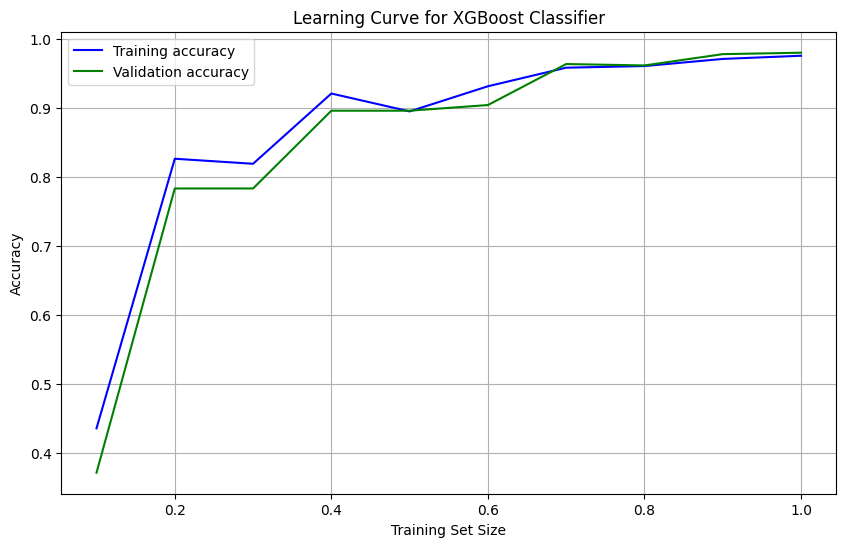

Validation Accuracy: 0.98
Test Accuracy: 0.97

Validation Precision: 0.92
Test Precision: 0.87

Validation Recall: 0.98
Test Recall: 0.99

Validation F1 Score: 0.94
Test F1 Score: 0.91

Validation AUC per class: {0: 1.0, 1: 0.9976771196283392, 2: 0.9586202330508475, 3: 1.0, 4: 0.9985739087301587}
Test AUC per class: {0: 1.0, 1: 0.9947003600390323, 2: 0.9896925227113906, 3: 0.9995281906109932, 4: 1.0}

Validation Confusion Matrix:
[[181   0   0   0   0]
 [  0 192   9   0   0]
 [  0   0  15   0   1]
 [  0   0   0  34   0]
 [  0   0   0   0  56]]
Test Confusion Matrix:
[[187   0   0   0   0]
 [  0 211  12   3   0]
 [  0   0  12   0   0]
 [  0   0   0  18   0]
 [  0   0   0   0  46]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      0.96      0.98       201
           2       0.62      0.94      0.75        16
           3       1.00      1.00      1.00        34

In [52]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# Assuming X_train_resampled, y_train_resampled, X_val, y_val, X_test, and y_test are predefined

# Define the hyperparameter space for Hyperopt
space = {
    'max_depth': hp.quniform("max_depth", 3, 18, 1),
    'gamma': hp.uniform('gamma', 1, 9),
    'reg_alpha': hp.quniform('reg_alpha', 40, 180, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 0, 10, 1),
    'n_estimators': hp.quniform('n_estimators', 100, 500, 1),
    'seed': 0
}

def objective(space):
    clf = xgb.XGBClassifier(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=int(space['reg_alpha']),
        reg_lambda=space['reg_lambda'],
        min_child_weight=int(space['min_child_weight']),
        colsample_bytree=space['colsample_bytree'],
        use_label_encoder=False,
        eval_metric="mlogloss",
        random_state=42
    )
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred_val = clf.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred_val)

    return {'loss': -accuracy, 'status': STATUS_OK}

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=tpe.suggest,
                   max_evals=50,
                   trials=trials)

# Fit the XGBoost model using the best found hyperparameters
best_model = xgb.XGBClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    gamma=best_params['gamma'],
    reg_alpha=int(best_params['reg_alpha']),
    reg_lambda=best_params['reg_lambda'],
    min_child_weight=int(best_params['min_child_weight']),
    colsample_bytree=best_params['colsample_bytree'],
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

# Fit the best model on the resampled training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predictions on validation and test set
y_pred_val = best_model.predict(X_val)
y_pred_test = best_model.predict(X_test)

# Calculate Accuracy
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate Precision (using 'macro' for multiclass)
precision_val = precision_score(y_val, y_pred_val, average='macro')
precision_test = precision_score(y_test, y_pred_test, average='macro')

# Calculate Recall (using 'macro' for multiclass)
recall_val = recall_score(y_val, y_pred_val, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')

# Calculate F1 Score (using 'macro' for multiclass)
f1_val = f1_score(y_val, y_pred_val, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

# Confusion Matrix
cm_val = confusion_matrix(y_val, y_pred_val)
cm_test = confusion_matrix(y_test, y_pred_test)

# Binarize the output for ROC and AUC calculation (one-vs-rest approach)
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC Curve and AUC for each class
fpr_val, tpr_val, auc_val = {}, {}, {}
fpr_test, tpr_test, auc_test = {}, {}, {}

for i in range(y_val_bin.shape[1]):  # Loop over each class
    fpr_val[i], tpr_val[i], _ = roc_curve(y_val_bin[:, i], best_model.predict_proba(X_val)[:, i])
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], best_model.predict_proba(X_test)[:, i])
    auc_val[i] = auc(fpr_val[i], tpr_val[i])
    auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Learning Curve - Manual Calculation
train_sizes = np.linspace(0.1, 1.0, 10)  # Define the training sizes you want to use
train_scores = []
val_scores = []

# Use the original training set without re-splitting
for train_size in train_sizes:
    # Determine the subset of training data
    X_train_sub = X_train_resampled[:int(train_size * len(X_train_resampled))]
    y_train_sub = y_train_resampled[:int(train_size * len(y_train_resampled))]

    # Fit the model on the subset
    best_model.fit(X_train_sub, y_train_sub)

    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train_sub, best_model.predict(X_train_sub))
    train_scores.append(train_accuracy)

    # Calculate validation accuracy
    val_accuracy = accuracy_score(y_val, best_model.predict(X_val))
    val_scores.append(val_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label='Training accuracy', color='blue')
plt.plot(train_sizes, val_scores, label='Validation accuracy', color='green')
plt.title("Learning Curve for XGBoost Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Print metrics
print(f"Validation Accuracy: {accuracy_val:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}\n")

print(f"Validation Precision: {precision_val:.2f}")
print(f"Test Precision: {precision_test:.2f}\n")

print(f"Validation Recall: {recall_val:.2f}")
print(f"Test Recall: {recall_test:.2f}\n")

print(f"Validation F1 Score: {f1_val:.2f}")
print(f"Test F1 Score: {f1_test:.2f}\n")

print(f"Validation AUC per class: {auc_val}")
print(f"Test AUC per class: {auc_test}\n")

print(f"Validation Confusion Matrix:\n{cm_val}")
print(f"Test Confusion Matrix:\n{cm_test}")

# Classification Report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_pred_val))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

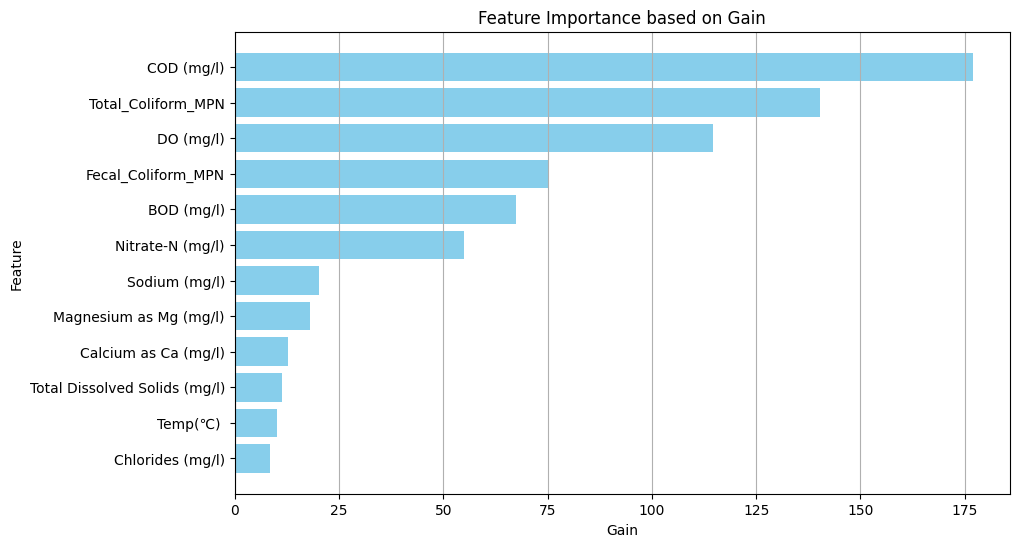

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
feature_importance = best_model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame(
    {'Feature': feature_importance.keys(), 'Importance': feature_importance.values()}
)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance based on Gain")
plt.xlabel("Gain")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


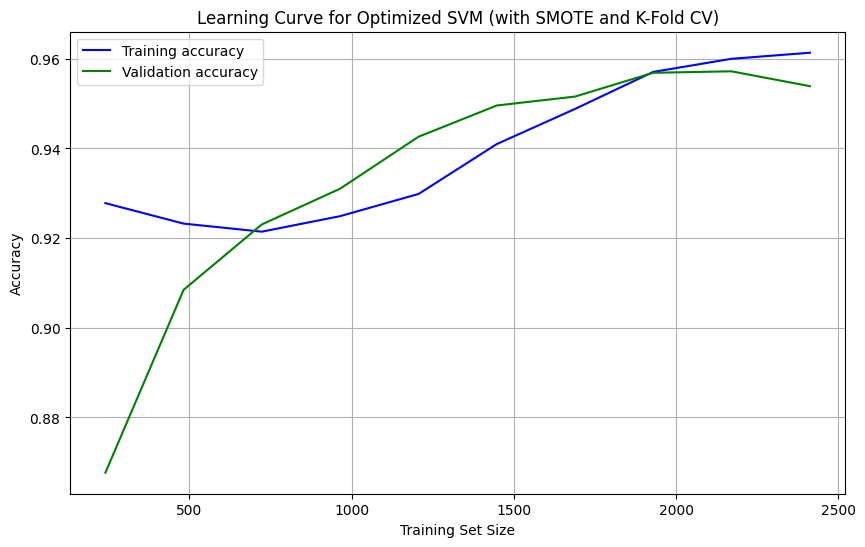

Validation Accuracy: 0.93
Test Accuracy: 0.91

Validation Precision: 0.85
Test Precision: 0.80

Validation Recall: 0.91
Test Recall: 0.93

Validation F1 Score: 0.87
Test F1 Score: 0.84

Validation Confusion Matrix:
[[178   3   0   0   0]
 [ 10 178   8   5   0]
 [  0   1  14   0   1]
 [  0   0   1  30   3]
 [  0   1   0   3  52]]
Test Confusion Matrix:
[[184   3   0   0   0]
 [ 17 189  11   9   0]
 [  0   0  12   0   0]
 [  0   1   0  16   1]
 [  0   0   0   2  44]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       181
           1       0.97      0.89      0.93       201
           2       0.61      0.88      0.72        16
           3       0.79      0.88      0.83        34
           4       0.93      0.93      0.93        56

    accuracy                           0.93       488
   macro avg       0.85      0.91      0.87       488
weighted avg       0.93      0.93      0.93       488



In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
svm_model = SVC(class_weight='balanced',
                random_state=42, C=1,
                kernel='rbf',
                gamma='scale', probability=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')

svm_model.fit(X_train_resampled, y_train_resampled)

# Predictions on validation and test sets
y_pred_val = svm_model.predict(X_val)
y_pred_test = svm_model.predict(X_test)

# Accuracy calculation
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Precision, Recall, and F1-Score (using 'macro' for multiclass)
precision_val = precision_score(y_val, y_pred_val, average='macro')
precision_test = precision_score(y_test, y_pred_test, average='macro')

recall_val = recall_score(y_val, y_pred_val, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')

f1_val = f1_score(y_val, y_pred_val, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

# Confusion Matrix
cm_val = confusion_matrix(y_val, y_pred_val)
cm_test = confusion_matrix(y_test, y_pred_test)

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(
    svm_model, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=kf
)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training accuracy', color='blue')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation accuracy', color='green')
plt.title("Learning Curve for Optimized SVM (with SMOTE and K-Fold CV)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Print metrics
print(f"Validation Accuracy: {accuracy_val:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}\n")

print(f"Validation Precision: {precision_val:.2f}")
print(f"Test Precision: {precision_test:.2f}\n")

print(f"Validation Recall: {recall_val:.2f}")
print(f"Test Recall: {recall_test:.2f}\n")

print(f"Validation F1 Score: {f1_val:.2f}")
print(f"Test F1 Score: {f1_test:.2f}\n")

print(f"Validation Confusion Matrix:\n{cm_val}")
print(f"Test Confusion Matrix:\n{cm_test}")

# Classification Report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_pred_val))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# Cross-validation and accuracy results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


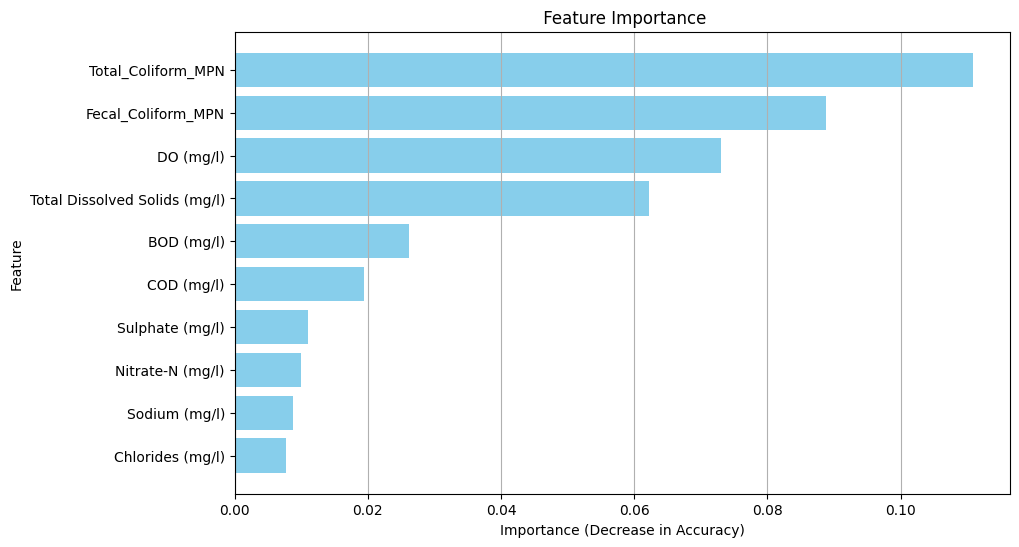

Top 6 Features based on Permutation Importance:
                          Feature  Importance
11             Total_Coliform_MPN    0.110838
12             Fecal_Coliform_MPN    0.088753
3                       DO (mg/l)    0.073006
2   Total Dissolved Solids (mg/l)    0.062168
9                      BOD (mg/l)    0.026176
10                     COD (mg/l)    0.019427
14                Sulphate (mg/l)    0.011043
13               Nitrate-N (mg/l)    0.010020
15                  Sodium (mg/l)    0.008793
4                Chlorides (mg/l)    0.007771


In [55]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Assuming svm_model is already trained, and X_test, y_test are your validation/test data

# Compute permutation importance
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame with feature names and importance scores
importance_df = pd.DataFrame(
    {'Feature': X_test.columns, 'Importance': result.importances_mean}
)

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 6 most important features
top_6_features = importance_df.head(10)

# Plot top 6 feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_6_features['Feature'], top_6_features['Importance'], color='skyblue')
plt.title(" Feature Importance")
plt.xlabel("Importance (Decrease in Accuracy)")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.grid(axis='x')
plt.show()

# Print the top 6 features
print("Top 6 Features based on Permutation Importance:")
print(top_6_features)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEsti

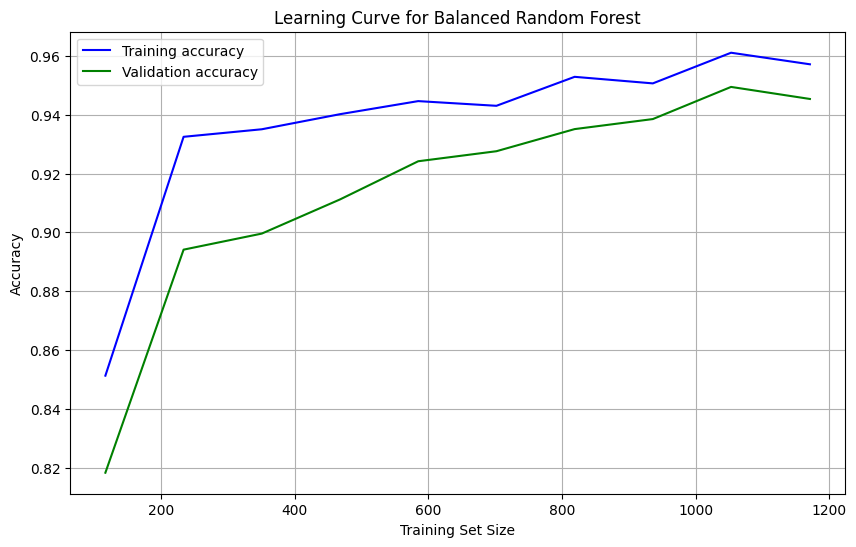

Validation Accuracy: 0.98
Test Accuracy: 0.98

Validation Precision: 0.94
Test Precision: 0.90

Validation Recall: 0.96
Test Recall: 0.98

Validation F1 Score: 0.95
Test F1 Score: 0.93

Validation AUC per class: {0: 1.0, 1: 0.9994799521555984, 2: 0.9592161016949152, 3: 1.0, 4: 0.9984499007936507}
Test AUC per class: {0: 1.0, 1: 0.9980820350617451, 2: 0.9928371767994411, 3: 0.9997640953054966, 4: 1.0}

Validation Confusion Matrix:
[[181   0   0   0   0]
 [  0 196   5   0   0]
 [  0   1  14   0   1]
 [  0   0   0  32   2]
 [  0   0   0   0  56]]
Test Confusion Matrix:
[[187   0   0   0   0]
 [  0 216   9   1   0]
 [  0   0  12   0   0]
 [  0   1   0  17   0]
 [  0   0   0   0  46]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       0.99      0.98      0.98       201
           2       0.74      0.88      0.80        16
           3       1.00      0.94      0.97        34

In [56]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

brf_model = BalancedRandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42
)

# Fit the model
brf_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_val = brf_model.predict(X_val)
y_pred_test = brf_model.predict(X_test)

# Calculate Accuracy
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate Precision (using 'macro' for multiclass)
precision_val = precision_score(y_val, y_pred_val, average='macro')
precision_test = precision_score(y_test, y_pred_test, average='macro')

# Calculate Recall (using 'macro' for multiclass)
recall_val = recall_score(y_val, y_pred_val, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')

# Calculate F1 Score (using 'macro' for multiclass)
f1_val = f1_score(y_val, y_pred_val, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

# Confusion Matrix
cm_val = confusion_matrix(y_val, y_pred_val)
cm_test = confusion_matrix(y_test, y_pred_test)

# Binarize the output for ROC and AUC calculation (one-vs-rest approach)
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC Curve and AUC for each class
fpr_val, tpr_val, auc_val = {}, {}, {}
fpr_test, tpr_test, auc_test = {}, {}, {}

for i in range(y_val_bin.shape[1]):  # Loop over each class
    fpr_val[i], tpr_val[i], _ = roc_curve(y_val_bin[:, i], brf_model.predict_proba(X_val)[:, i])
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], brf_model.predict_proba(X_test)[:, i])
    auc_val[i] = auc(fpr_val[i], tpr_val[i])
    auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    brf_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training accuracy', color='blue')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation accuracy', color='green')
plt.title("Learning Curve for Balanced Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Print metrics
print(f"Validation Accuracy: {accuracy_val:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}\n")

print(f"Validation Precision: {precision_val:.2f}")
print(f"Test Precision: {precision_test:.2f}\n")

print(f"Validation Recall: {recall_val:.2f}")
print(f"Test Recall: {recall_test:.2f}\n")

print(f"Validation F1 Score: {f1_val:.2f}")
print(f"Test F1 Score: {f1_test:.2f}\n")

print(f"Validation AUC per class: {auc_val}")
print(f"Test AUC per class: {auc_test}\n")

print(f"Validation Confusion Matrix:\n{cm_val}")
print(f"Test Confusion Matrix:\n{cm_test}")

# Classification Report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_pred_val))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BalancedRandomForestClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


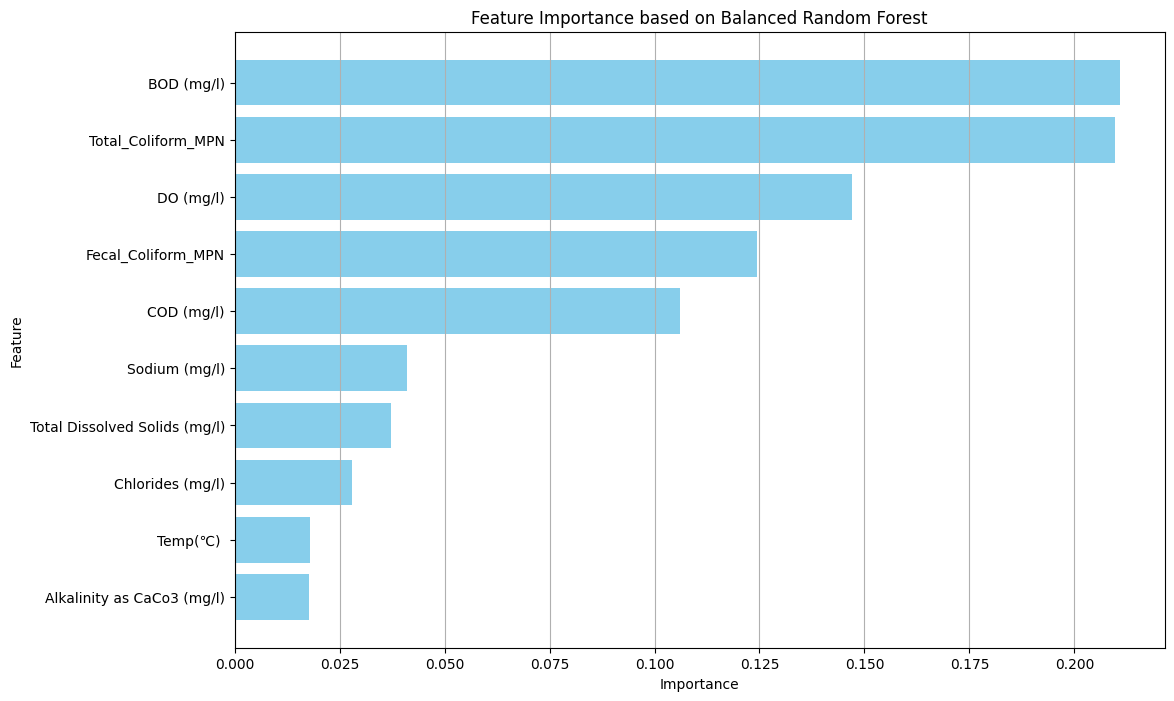

Features based on Balanced Random Forest Feature Importance:
                          Feature  Importance
9                      BOD (mg/l)    0.210952
11             Total_Coliform_MPN    0.209627
3                       DO (mg/l)    0.147089
12             Fecal_Coliform_MPN    0.124515
10                     COD (mg/l)    0.106162
15                  Sodium (mg/l)    0.040971
2   Total Dissolved Solids (mg/l)    0.037138
4                Chlorides (mg/l)    0.027895
0                        Temp(℃)     0.017930
8      Alkalinity as CaCo3 (mg/l)    0.017639


In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming brf_model is a trained BalancedRandomForestClassifier and X_train_resampled has feature names

# Get the feature importances
feature_importance = brf_model.feature_importances_

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,  # X_train_resampled is the DataFrame with feature names
    'Importance': feature_importance
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = importance_df.head(10)

# Plot top 10 feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.title("Feature Importance based on Balanced Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.grid(axis='x')
plt.show()

# Print the top 10 features
print("Features based on Balanced Random Forest Feature Importance:")
print(top_10_features)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BalancedRandomForestClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BalancedRandomForestClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn

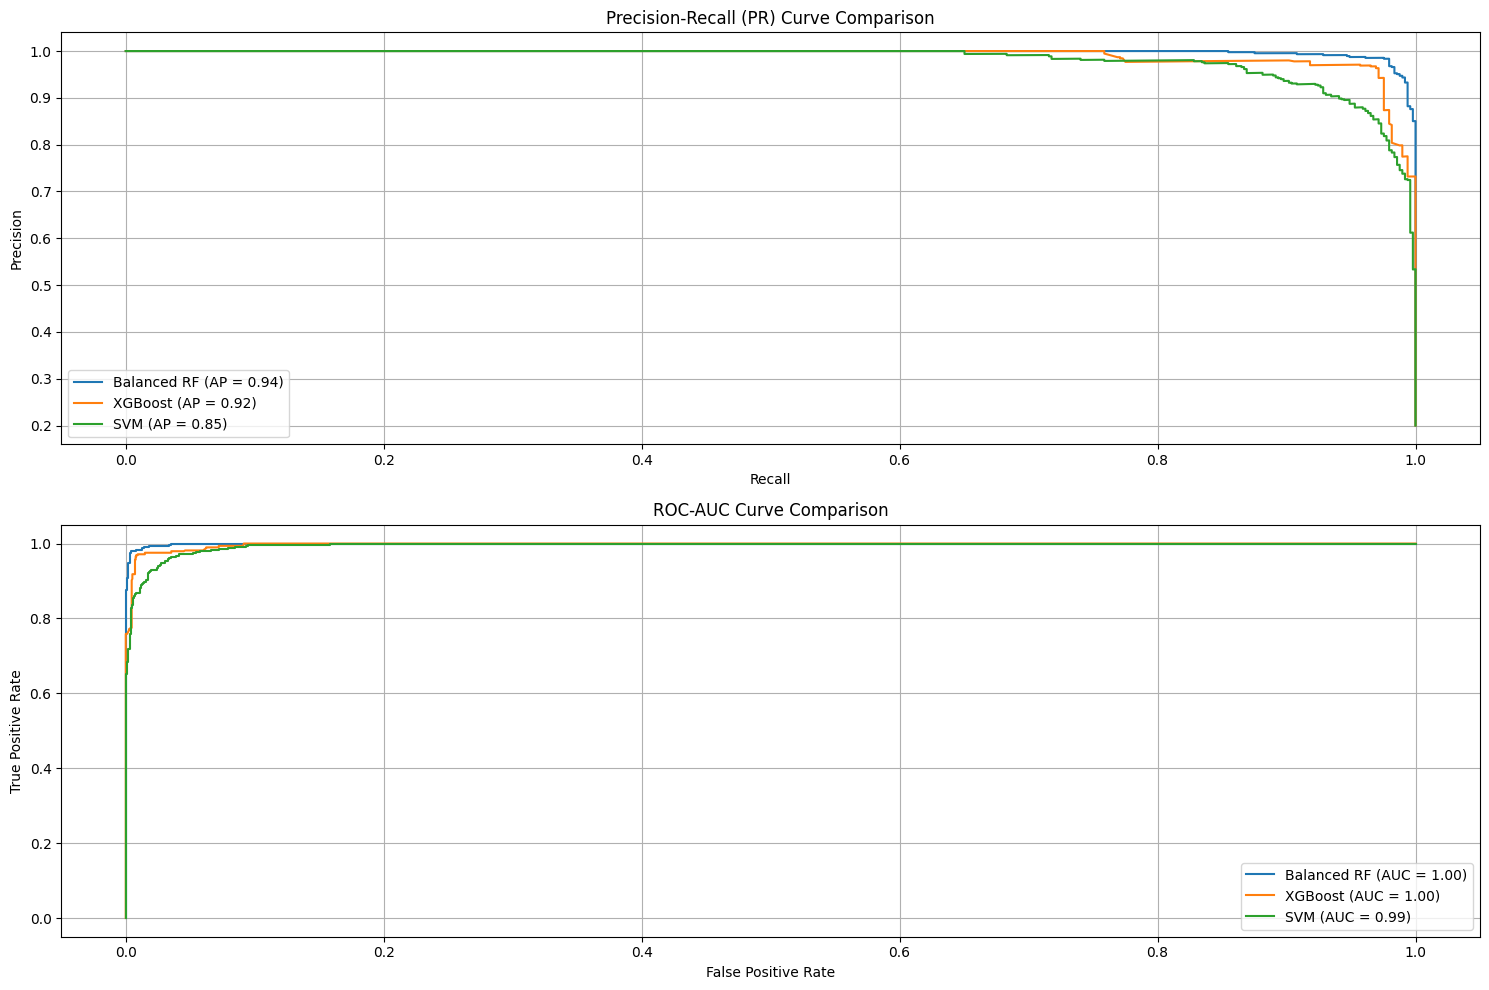

In [58]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize figure for PR and ROC-AUC curves
plt.figure(figsize=(15, 10))

# **Subplot for PR Curves**
plt.subplot(2, 1, 1)
plt.title("Precision-Recall (PR) Curve Comparison")

for model_name, model in [
    ("Balanced RF", brf_model),
    ("XGBoost", best_model),
    ("SVM", svm_model)
]:
    # Get prediction probabilities or decision scores
    if hasattr(model, "predict_proba"):  # For models with predict_proba
        y_scores = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):  # For models with decision_function
        y_scores = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model {model_name} does not support probability or decision function output.")

    # Calculate average precision across all classes
    avg_precision = average_precision_score(y_test_bin, y_scores, average="macro")

    # Compute a macro-average PR curve
    precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_scores.ravel())
    plt.plot(recall, precision, label=f"{model_name} (AP = {avg_precision:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.grid(True)

# **Subplot for ROC-AUC Curves**
plt.subplot(2, 1, 2)
plt.title("ROC-AUC Curve Comparison")

for model_name, model in [
    ("Balanced RF", brf_model),
    ("XGBoost", best_model),
    ("SVM", svm_model)
]:
    # Get prediction probabilities or decision scores
    if hasattr(model, "predict_proba"):  # For models with predict_proba
        y_scores = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):  # For models with decision_function
        y_scores = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model {model_name} does not support probability or decision function output.")

    # Compute a macro-average ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid(True)

plt.tight_layout()
plt.show()
